In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from Bio.SeqUtils import Seq
from time import time

from utils import generate_random_sequence, plot_times

from effidict import LRUDBDict, LRUDict, DBDict

from collections import OrderedDict, namedtuple

from shutil import rmtree
import os

In [ ]:
Oligo = namedtuple(
    "Oligo",
    [
        "sequence",
        "chromosome",
        "start",
        "end",
        "strand",
        "length",
        "additional_information_fasta",
    ],
)

In [3]:
MAX_IN_MEMORY = 1000
BATCH_SIZE = 10

In [4]:
# Original implementation
def create_oligo_dict(n_regions, n_oligos):
    t = time()
    oligo_dict = {}
    for region in range(1, n_regions + 1):
        region_key = f'region_{region}'
        oligo_dict[region_key] = {}

        for oligo in range(1, n_oligos + 1):
            oligo_key = f'{region_key}::oligo_{oligo}'
            sequence = generate_random_sequence(25)

            oligo_dict[region_key][oligo_key] = {
                'sequence': Seq(sequence),
                'chromosome': 1,
                'start': [33],
                'end': [33],
                'strand': '-',
                'length': 25,
                'additional_information_fasta': ['vfdcsxz']
            }
    exec_time = time() - t

    return oligo_dict, exec_time

In [5]:
# With pickle
def create_oligo_lru_dict(n_regions, n_oligos, max_in_memory=MAX_IN_MEMORY):
    t = time()
    oligo_dict = LRUDict(max_in_memory=max_in_memory)

    for region in range(1, n_regions + 1):
        region_key = f'region_{region}'
        oligo_dict[region_key] = {}

        for oligo in range(1, n_oligos + 1):
            oligo_key = f'{region_key}::oligo_{oligo}'
            sequence = generate_random_sequence(25)

            oligo_dict[region_key][oligo_key] = {
                'sequence': Seq(sequence),
                'chromosome': 1,
                'start': (33,),
                'end': (33,),
                'strand': '-',
                'length': 25,
                'additional_information_fasta': ['vfdcsxz']
            }
    exec_time = time() - t

    return oligo_dict, exec_time

In [6]:
# With Sqlite3 and memory
def create_oligo_lru_db_dict(n_regions, n_oligos, max_in_memory=MAX_IN_MEMORY, batch_size=BATCH_SIZE, storage_path="cache.db"):
    t = time()
    oligo_dict = LRUDBDict(max_in_memory=max_in_memory, storage_path=storage_path, batch_size=batch_size)

    for region in range(1, n_regions + 1):
        region_key = f'region_{region}'
        oligo_dict[region_key] = {}

        for oligo in range(1, n_oligos + 1):
            oligo_key = f'{region_key}::oligo_{oligo}'
            sequence = generate_random_sequence(25)

            oligo_dict[region_key][oligo_key] = {
                'sequence': sequence,
                'chromosome': 1,
                'start': (33,),
                'end': (33,),
                'strand': '-',
                'length': 25,
                'additional_information_fasta': ['vfdcsxz']
            }
    exec_time = time() - t

    return oligo_dict, exec_time

In [7]:
# With Sqlite3 only
def create_oligo_db_dict(n_regions, n_oligos, storage_path="cache.db"):
    t = time()
    oligo_dict = DBDict(storage_path=storage_path)

    for region in range(1, n_regions + 1):
        region_key = f'region_{region}'
        oligo_dict[region_key] = {}

        for oligo in range(1, n_oligos + 1):
            oligo_key = f'{region_key}::oligo_{oligo}'
            sequence = generate_random_sequence(25)
            oligo_dict[region_key][oligo_key] = {
                'sequence': Seq(sequence),
                'chromosome': 1,
                'start': (33,),
                'end': (33,),
                'strand': '-',
                'length': 25,
                'additional_information_fasta': ['vfdcsxz']
            }
    exec_time = time() - t

    return oligo_dict, exec_time


In [8]:
# With namedtuple
def create_oligo_dict_named_tuple(n_regions, n_oligos):
    t = time()
    oligo_dict = {}

    for region in range(1, n_regions + 1):
        region_key = f'region_{region}'
        oligo_dict[region_key] = {}

        for oligo in range(1, n_oligos + 1):
            oligo_key = f'{region_key}::oligo_{oligo}'
            sequence = generate_random_sequence(25)
            oligo = Oligo(sequence=Seq(sequence), 
                  chromosome=1, 
                  start=(33,), 
                  end=(33,), 
                  strand='-', 
                  length=25, 
                  additional_information_fasta=['vfdcsxz'])

            oligo_dict[region_key][oligo_key] = oligo
    exec_time = time() - t

    return oligo_dict, exec_time

----------------------------------------------------
Now testing with: dict
n_regions: 0
n_regions: 1000
n_regions: 2000
n_regions: 3000
n_regions: 4000
n_regions: 5000
n_regions: 6000
n_regions: 7000
n_regions: 8000
n_regions: 9000
n_regions: 10000
----------------------------------------------------
Now testing with: lru_dict
n_regions: 0
n_regions: 1000
n_regions: 2000
n_regions: 3000
n_regions: 4000
n_regions: 5000
n_regions: 6000
n_regions: 7000
n_regions: 8000
n_regions: 9000
n_regions: 10000
----------------------------------------------------
Now testing with: lru_db_dict
n_regions: 0
n_regions: 1000
n_regions: 2000
n_regions: 3000
n_regions: 4000
n_regions: 5000
n_regions: 6000
n_regions: 7000
n_regions: 8000
n_regions: 9000
n_regions: 10000
----------------------------------------------------
Now testing with: db_dict
n_regions: 0
n_regions: 1000
n_regions: 2000
n_regions: 3000
n_regions: 4000
n_regions: 5000
n_regions: 6000
n_regions: 7000
n_regions: 8000
n_regions: 9000
n_r

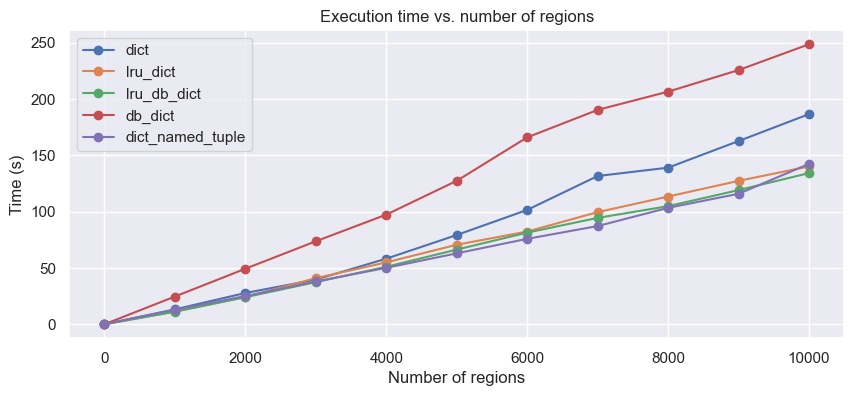

In [9]:
n_regions_values = range(0, 10001, 1000)
n_oligos_per_regions = 1000

all_times = []
methods = [create_oligo_dict, 
           create_oligo_lru_dict, 
           create_oligo_lru_db_dict, 
           create_oligo_db_dict, 
           create_oligo_dict_named_tuple]



for method in methods:
    method_name = method.__name__.split('create_oligo_')[1]
    times = []
    print('----------------------------------------------------')
    print(f"Now testing with: {method_name}")
    for n_regions in n_regions_values:
        print(f"n_regions: {n_regions}")
        _, exec_time = method(n_regions, n_oligos_per_regions)
        times.append(exec_time)
        import os

        [os.remove(item) for item in os.listdir() if item.startswith("cache") and os.path.isfile(item)]
        [rmtree(item) for item in os.listdir() if item.startswith("cache") and os.path.isdir(item)]
        del _


    all_times.append((times, method_name))



plot_times(all_times, n_regions_values)